#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 12

L'obiettivo di questa esercitazione è utilizzare i modelli di Reti Neurali profonde (DNN) per riconoscere e distinguere le dieci cifre (0-9) scritte a mano presenti nel dataset MNIST. Questo dataset comprende $70000$ immagini di cifre su scala di grigio, ciascuna rappresentata con $28\times 28$ pixel. Ciascun pixel può assumere valori tra $0$ e $256$, e quindi può assumere $256$ colori tra il bianco e il nero. Dal momento che ci sono $10$ categorie, una per ogni cifra, questo problema rappresenta un generico **problema di classificazione**. 

In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Per prima cosa è necessario effettuare il download dei dati di MNIST dal web. Quindi si importa il modulo `mnist` e si usa la classe `load_data()` per avere i datset di training e di test pronti per l'utilizzo.
Dopo aver caricato i dati, è necessario formattarli in modo corretto per renderli compatibili con la DNN che legge matrici.

In [20]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [21]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#print('X_train shape:', X_train.shape)
#print('X_test shape:', X_test.shape)
#print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
#print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
#print('... and with label', Y_train[20], 'after to_categorical')
#print()
#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### <span style="color:royalblue">Esercizio 12.1

Optimizer: SGD
SGD
Test loss: 0.06488931179046631
Test accuracy: 0.9807999730110168
313/313 [==============================] - 1s 2ms/step


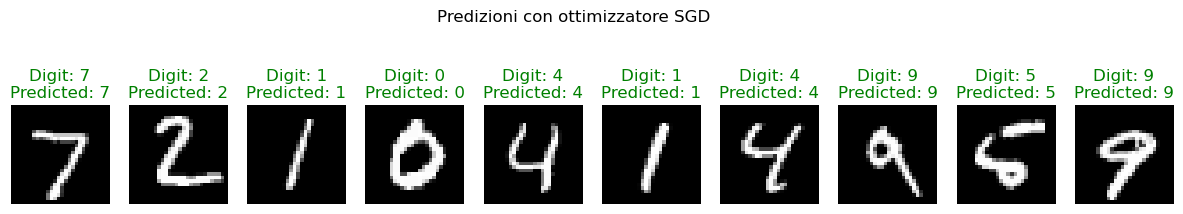

Optimizer: Adam
Adam
Test loss: 0.12149151414632797
Test accuracy: 0.9836000204086304
313/313 [==============================] - 1s 2ms/step


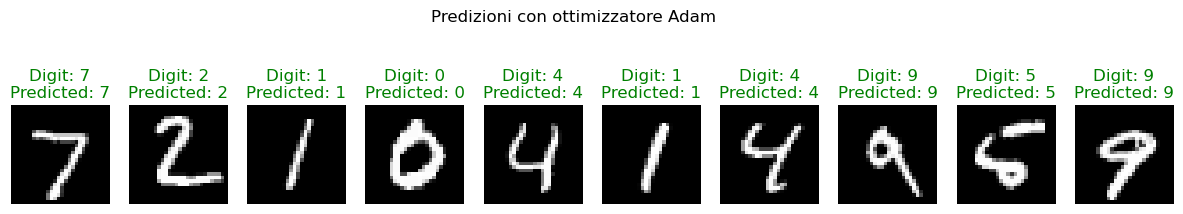

Optimizer: Adadelta
Adadelta
Test loss: 0.47140970826148987
Test accuracy: 0.888700008392334
313/313 [==============================] - 1s 2ms/step


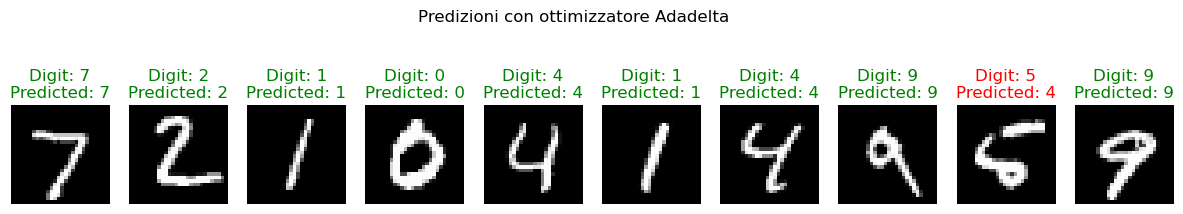

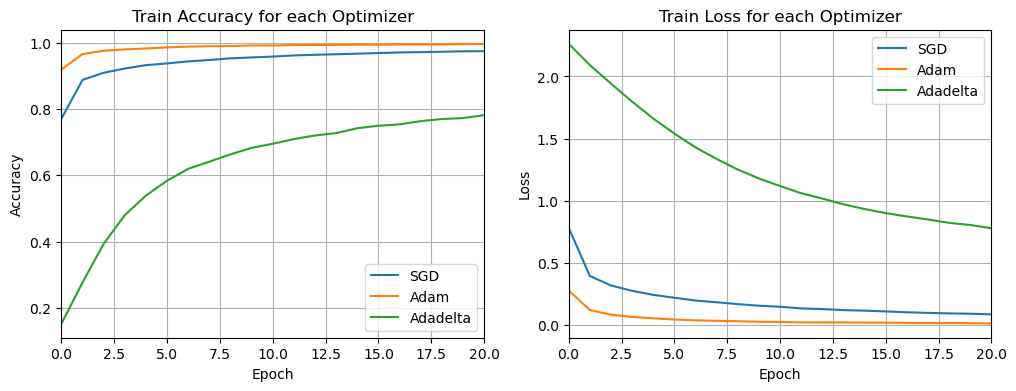

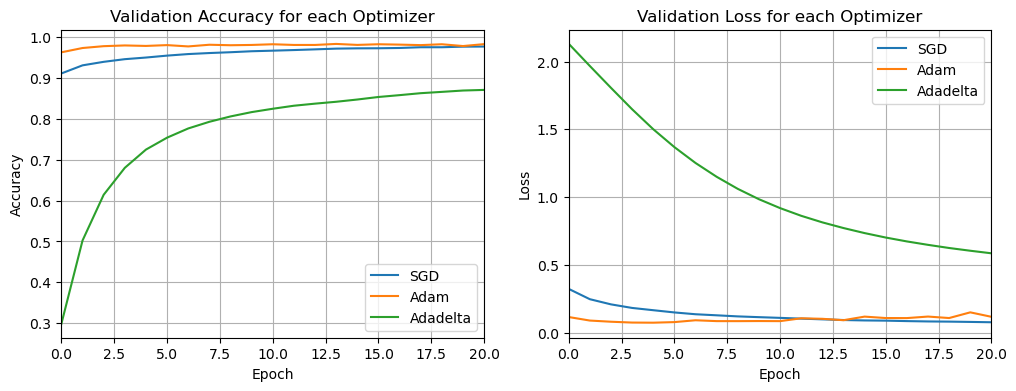

In [23]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

#Dizionario degli ottimizzatori da testare
optimizers = [
    ('SGD', SGD() ),
    ('Adam', Adam()),
    ('Adadelta', Adadelta())
]

#Definisco i parametri
# training parameters
batch_size = 32
epochs = 30

#Dizionario per le storie
histories = {}

for name_o, optimizer in optimizers:
    print("Optimizer: " + name_o)

    #Cero il modello
    model_DNN=create_DNN()
    #Compilo il modello
    model_DNN.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
    #Alleno la DNN e salvo nel dizionario history
    history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle = True,
          verbose=0,
          validation_data=(X_test, Y_test))
    
    histories[name_o] = history
    
    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)

    # print performance
    print(name_o)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    #Predizioni su X_test
    predictions = model_DNN.predict(X_test)

    #Visualizzo le prime 10 immagini
    X_test_img = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15,3)) 
    for i in range(10):    
        ax = plt.subplot(1, 10, i + 1)    
        plt.imshow(X_test_img[i], cmap='gray')    
        true_label = np.argmax(Y_test[i])
        predicted_label = np.argmax(predictions[i])
        color = 'g' if true_label == predicted_label else 'r'
        title = "Digit: " + str(true_label) + "\nPredicted: " + str(predicted_label)
        plt.title(title,  color = color)   
        plt.axis('off') 
    plt.suptitle('Predizioni con ottimizzatore ' + name_o)
    plt.tight_layout
    plt.show()

plt.figure(figsize = (12,4))

# Validation Accuracy
plt.subplot(1, 2, 1 )
for name_o in histories:
    plt.plot(histories[name_o].history['acc'], label = name_o )
plt.title ('Train Accuracy for each Optimizer')
plt.xlim(0, 20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

#Validation Loss
plt.subplot(1, 2, 2 )
for name_o in histories:
    plt.plot(histories[name_o].history['loss'], label = name_o )
plt.title ('Train Loss for each Optimizer')
plt.xlim(0, 20)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize = (12,4))

# Validation Accuracy
plt.subplot(1, 2, 1 )
for name_o in histories:
    plt.plot(histories[name_o].history['val_acc'], label = name_o )
plt.title ('Validation Accuracy for each Optimizer')
plt.xlim(0, 20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

#Validation Loss
plt.subplot(1, 2, 2 )
for name_o in histories:
    plt.plot(histories[name_o].history['val_loss'], label = name_o )
plt.title ('Validation Loss for each Optimizer')
plt.xlim(0, 20)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.show()

Si è deciso di utilizzare 30 epoche per questo modello. Sono stati utilizzati tre ottimizzatori: SGD, Adam, e Adadelta. Le predizioni di SGD e Adam sono sempre corrette, mentre le predizioni di Adadelta non lo sono. In particolare, Adadelta confonde un cinque con un quattro. Nonostante sia Adam sia SGD producano delle predizioni accurate, si osserva dai grafici che Adam risulta essere l'ottimizzatre migliore tra i tre testati. Infatti per questo utilimo ottimizzatore si hanno i valori di Loss che diminuiscono più velocemente e valori di Accuracy più elevati. L'accuratezza raggiunta è del $98.4\%$

### <span style="color:royalblue">Esercizio 12.2
Si è cambiata la struttura nella NN usando layers convoluzionali (CNN). Si sono utilizzati: Conv2D, MaxPooling2D, Dropout, ma anche Flatten e, per finire, un layer standard Dense. Una CNN risulta essere particolarmente vantaggiosa per il riconoscimento di cifre scritte a mano perchè è meno sensibile a rotazioni e traslazioni che possono esserci in grafie differenti.
- Dense: ogni neurone di un layer è connesso a tutti i neuroni del layer precedente.
- Conv2D: utilizza filtri 5×5 che scorrono sull’immagine spostandosi di un pixel per volta (stride 1) per estrarre caratteristiche locali.
- MaxPooling: Prende il massimo da ciascuna finestra per conservare le informazioni più importanti
- Dropout: evita che le rete impari chemi fissi disattivando certi neuroni durante l'allenamento.
- Flatten: trasforma strutture multidimensionali (altezza × larghezza × profondità) in un vettore 1D che può essere passato ai layer densi.

In [24]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [25]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(20, kernel_size=(5, 5), strides=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(20, kernel_size=(5, 5), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu' ))
    model.add(Dense(10, activation = 'softmax' ))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    return model

In [26]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle = True,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2551 - acc: 0.9197 - val_loss: 0.0809 - val_acc: 0.9767
Epoch 2/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1000 - acc: 0.9686 - val_loss: 0.0664 - val_acc: 0.9779
Epoch 3/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0784 - acc: 0.9755 - val_loss: 0.0509 - val_acc: 0.9852
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0678 - acc: 0.9787 - val_loss: 0.0430 - val_acc: 0.9873
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0605 - acc: 0.9805 - val_loss: 0.0425 - val_acc: 0.9863
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0575 - acc: 0.9814 - val_loss: 0.0348 - val_acc: 0.9889
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0506 - acc: 0.9841 - val_loss: 0.0346 - val_acc: 0.9896
Epoch 8/30
1875/1875 [==============================] -

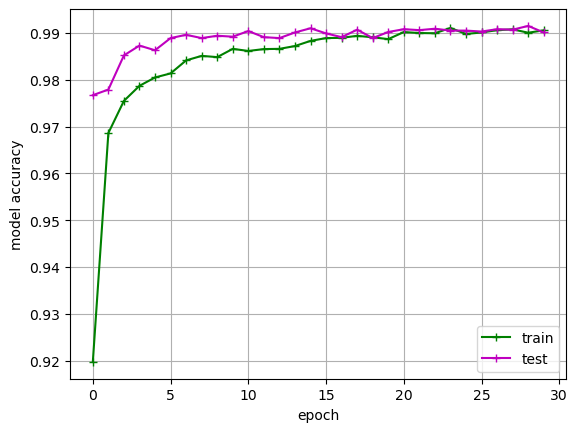

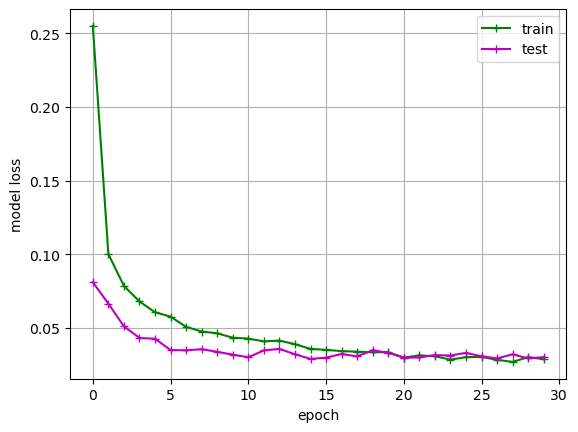

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'], color = 'g', marker = '+')
plt.plot(history.history['val_acc'], color = 'm', marker = '+')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color = 'g', marker = '+')
plt.plot(history.history['val_loss'], color = 'm', marker = '+')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

Utilizzando gli strati di convoluzione nella NN si ottiene un'accuratezza maggiore. In particolare per l'ottimizzatore Adam si è arrivati ad un'acuratezza del $99.0 \%$, mentre nel caso precedente era pari a $98.4 \%$

### <span style="color:royalblue">Esercizio 12.3
Si creano 10 immagini delle proprie cifre scritte a mano e si importano nel codice per testare la CNN costruita.

In [28]:
from PIL import Image
import os

data = {}

digit_folder = "./Numeri"
for i in range (10):
    img_name = str(i)
    digit_filename = digit_folder + "/" + img_name + ".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data[img_name]= np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[img_name][k,j]=pix[j,k]

    data[img_name] /= 255

    print(data[img_name].shape)

Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)


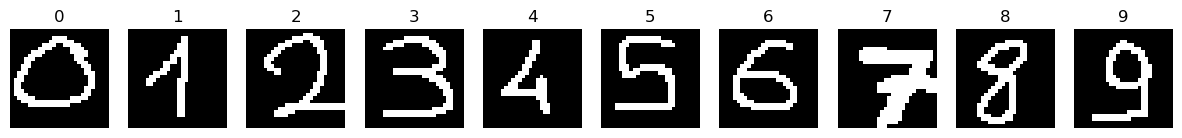

In [29]:
#Stampo i miei numeri
plt.figure(figsize=(15, 5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(data[str(i)], cmap='gray')    
    plt.title(str(i))   
    plt.axis('off') 
    
plt.tight_layout
plt.show()

1/1 [==============================] - 0s 43ms/step


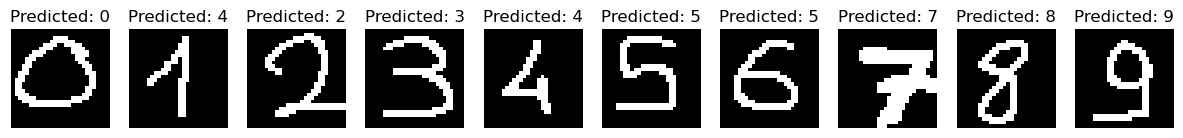

In [30]:
plt.figure(figsize=(15, 5))  

#Ho già caricato i file dei numeri, adesso faccio il modello

for i in range (10):
    ax = plt.subplot(1, 10, i + 1)
    img_name = str(i)
    data[img_name] = data[img_name].reshape(1, xdim, ydim, 1)
    #print(data[img_name].shape)
    pred_0 = model_CNN.predict(data[img_name])
    data[img_name] = data[img_name].reshape(xdim,ydim)
    plt.imshow(data[img_name], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

Dal risultato ottenuto si può notare che il modello CNN non riconoce bene tutti i numeri inseriti manualmente. In particolare non riconosce l'uno e il sei.